# Experiments with DeepSEA and DanQ

Train the DeepSEA models with different sequence feature orders and using different sequence context lengths.
In order to train the models from scratch, remove the '-evaluate' option.
Training these models takes a significant amout of time, so if possible, we suggest to run these scripts in parallel (outside of the notebook).

In [1]:
#!conda install --yes r-ggrepel r-dplyr

In [2]:
import os
%load_ext rpy2.ipython

from IPython.display import Image

In [4]:
train_models = False

In [5]:
if train_models:
    !python run_genomics_model.py -dev 0 -o 1 -flank 150 -model dsea
    !python run_genomics_model.py -dev 0 -o 2 -flank 150 -model dsea 
    !python run_genomics_model.py -dev 0 -o 3 -flank 150 -model dsea 

    !python run_genomics_model.py -dev 0 -o 1 -flank 400 -model dsea 
    !python run_genomics_model.py -dev 0 -o 2 -flank 400 -model dsea 
    !python run_genomics_model.py -dev 0 -o 3 -flank 400 -model dsea 

    !python run_genomics_model.py -dev 0 -o 1 -flank 900 -model dsea 
    !python run_genomics_model.py -dev 0 -o 2 -flank 900 -model dsea 
    !python run_genomics_model.py -dev 0 -o 3 -flank 900 -model dsea 


In [6]:
if train_models:
    !python run_genomics_model.py -dev 2 -o 1 -flank 150 -model danq
    !python run_genomics_model.py -dev 2 -o 2 -flank 150 -model danq
    !python run_genomics_model.py -dev 2 -o 3 -flank 150 -model danq

    !python run_genomics_model.py -dev 2 -o 1 -flank 400 -model danq
    !python run_genomics_model.py -dev 2 -o 2 -flank 400 -model danq
    !python run_genomics_model.py -dev 2 -o 3 -flank 400 -model danq
 
    !python run_genomics_model.py -dev 2 -o 1 -flank 900 -model danq
    !python run_genomics_model.py -dev 2 -o 2 -flank 900 -model danq
    !python run_genomics_model.py -dev 2 -o 3 -flank 900 -model danq

In [9]:
if train_models:
    !python run_genomics_model.py -dev 2 -o 1 -flank 400 -model dsea -strand single
    !python run_genomics_model.py -dev 2 -o 2 -flank 400 -model dsea -strand single
    !python run_genomics_model.py -dev 2 -o 3 -flank 400 -model dsea -strand single
    
    !python run_genomics_model.py -dev 2 -o 1 -flank 400 -model danq -strand single
    !python run_genomics_model.py -dev 2 -o 2 -flank 400 -model danq -strand single
    !python run_genomics_model.py -dev 2 -o 3 -flank 400 -model danq -strand single

## Evaluate performance difference due to strandedness for different sequence feature orders

In [7]:
%%R
library(ggplot2)

# load data
r11 = data.frame(auprc=t(as.matrix(read.table('deepsea_results/evaluation/dsea_ssingle_o1_f400_aTrue_rr1/auprc.tsv',header=T))))
r12 = data.frame(auprc=t(as.matrix(read.table('deepsea_results/evaluation/dsea_sdouble_o1_f400_aTrue_rr1/auprc.tsv',header=T))))


r21 = data.frame(auprc=t(as.matrix(read.table('deepsea_results/evaluation/dsea_ssingle_o2_f400_aTrue_rr1/auprc.tsv',header=T))))
r22 = data.frame(auprc=t(as.matrix(read.table('deepsea_results/evaluation/dsea_sdouble_o2_f400_aTrue_rr1/auprc.tsv',header=T))))

r31 = data.frame(auprc=t(as.matrix(read.table('deepsea_results/evaluation/dsea_ssingle_o3_f400_aTrue_rr1/auprc.tsv',header=T))))
r32 = data.frame(auprc=t(as.matrix(read.table('deepsea_results/evaluation/dsea_sdouble_o3_f400_aTrue_rr1/auprc.tsv',header=T))))

# extract labels and categories
labels=data.frame(ids=rownames(r22))
labels$type = ""
labels$type[startsWith(as.character(labels$ids), 'E')] = "Histone"
labels$type[startsWith(as.character(labels$ids), 'wgEncodeAwgTfbs')] = "Tfbs"
labels$type[startsWith(as.character(labels$ids), 'wgEncodeAwgDnase')] = "Dnase"

df = data.frame(auprc1=r11$auprc, auprc2=r12$auprc, type=labels$type, labels=labels$ids)
print(sprintf("Order 1: diff-auPRC=%f", mean(df$auprc2-df$auprc1)))
df = data.frame(auprc1=r21$auprc, auprc2=r22$auprc, type=labels$type, labels=labels$ids)
mean(df$auprc2-df$auprc1)
print(sprintf("Order 2: diff-auPRC=%f", mean(df$auprc2-df$auprc1)))
df = data.frame(auprc1=r31$auprc, auprc2=r32$auprc, type=labels$type, labels=labels$ids)
mean(df$auprc2-df$auprc1)
print(sprintf("Order 3: diff-auPRC=%f", mean(df$auprc2-df$auprc1)))


[1] "Order 1: diff-auPRC=-0.004742"
[1] "Order 2: diff-auPRC=0.004979"
[1] "Order 3: diff-auPRC=0.009118"


In [8]:
%%R
library(ggplot2)

# load data
r11 = data.frame(auprc=t(as.matrix(read.table('deepsea_results/evaluation/danq_ssingle_o1_f400_aTrue_rr1/auprc.tsv',header=T))))
r12 = data.frame(auprc=t(as.matrix(read.table('deepsea_results/evaluation/danq_sdouble_o1_f400_aTrue_rr1/auprc.tsv',header=T))))


r21 = data.frame(auprc=t(as.matrix(read.table('deepsea_results/evaluation/danq_ssingle_o2_f400_aTrue_rr1/auprc.tsv',header=T))))
r22 = data.frame(auprc=t(as.matrix(read.table('deepsea_results/evaluation/danq_sdouble_o2_f400_aTrue_rr1/auprc.tsv',header=T))))

r31 = data.frame(auprc=t(as.matrix(read.table('deepsea_results/evaluation/danq_ssingle_o3_f400_aTrue_rr1/auprc.tsv',header=T))))
r32 = data.frame(auprc=t(as.matrix(read.table('deepsea_results/evaluation/danq_sdouble_o3_f400_aTrue_rr1/auprc.tsv',header=T))))

# extract labels and categories
labels=data.frame(ids=rownames(r22))
labels$type = ""
labels$type[startsWith(as.character(labels$ids), 'E')] = "Histone"
labels$type[startsWith(as.character(labels$ids), 'wgEncodeAwgTfbs')] = "Tfbs"
labels$type[startsWith(as.character(labels$ids), 'wgEncodeAwgDnase')] = "Dnase"

df = data.frame(auprc1=r11$auprc, auprc2=r12$auprc, type=labels$type, labels=labels$ids)
print(sprintf("Order 1: diff-auPRC=%f", mean(df$auprc2-df$auprc1)))
df = data.frame(auprc1=r21$auprc, auprc2=r22$auprc, type=labels$type, labels=labels$ids)
mean(df$auprc2-df$auprc1)
print(sprintf("Order 2: diff-auPRC=%f", mean(df$auprc2-df$auprc1)))
df = data.frame(auprc1=r31$auprc, auprc2=r32$auprc, type=labels$type, labels=labels$ids)
mean(df$auprc2-df$auprc1)
print(sprintf("Order 3: diff-auPRC=%f", mean(df$auprc2-df$auprc1)))

[1] "Order 1: diff-auPRC=0.012057"
[1] "Order 2: diff-auPRC=0.019168"
[1] "Order 3: diff-auPRC=0.019707"


Using information from both strands yields similar or slight performance improvements on average.
The improvement seems to be more pronounced for higher-order sequence features.

## Compare DeepSEA and DanQ performances

R[write to console]: 
Attaching package: ‘dplyr’


R[write to console]: The following objects are masked from ‘package:stats’:

    filter, lag


R[write to console]: The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




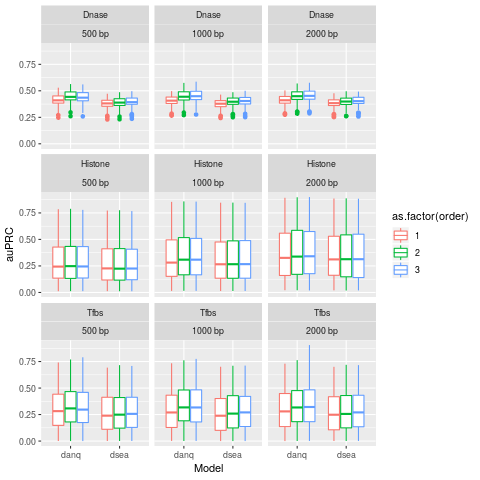

In [10]:
%%R

library(ggplot2)
library(ggrepel)
library(dplyr)
models = c("dsea", "danq")
orders = c(1,2,3)
flanks = c(150, 400, 900)

# we need to extract the label names
r211 <- data.frame(auprc=t(as.matrix(read.table('deepsea_results/evaluation/danq_sdouble_o1_f150_aTrue_rr1/auprc.tsv',header=T))))
labels <- data.frame(ids=rownames(r211))

# we need to obtain all results
list_frames <- list()
for (model in models) {
  for (order in orders) {
    for (flank in flanks) {
      list_frames[[length(list_frames)+1]] <- data.frame(auprc=t(as.matrix(read.table(sprintf('deepsea_results/evaluation/%s_sdouble_o%d_f%d_aTrue_rr1/auprc.tsv', model, order, flank),header=T))),
                                                       ids=labels,
                                                       model=model,
                                                       order=order,
                                                       wsize=2*flank + 200)
    }
  }
}


df<-bind_rows(list_frames)
df$type = ""
df$type[startsWith(as.character(df$ids), 'E')] = "Histone"
df$type[startsWith(as.character(df$ids), 'wgEncodeAwgTfbs')] = "Tfbs"
df$type[startsWith(as.character(df$ids), 'wgEncodeAwgDnase')] = "Dnase"

x=c("500"="500 bp", "1000"="1000 bp", "2000"="2000 bp")
g4 <- ggplot(df, aes(x=model, y=auprc, color=as.factor(order))) +
  geom_boxplot() +
  facet_wrap(.~type + wsize, ncol=3,
             labeller=labeller(wsize=x)) + ylab("auPRC") + xlab("Model")

print(g4)
#ggsave("figure/compare_danq_vs_dsea.png", g4)


As reported earlier, the DanQ architecture outperforms the DeepSEA architecture.

## Investigate the influence of sequence context lengths

Next, we illstrate how the context window lengths affects the performances for the DeepSEA model

In [11]:
%%R

library(ggplot2)
library(ggrepel)


# load data
r11 = data.frame(auprc=t(as.matrix(read.table('deepsea_results/evaluation/dsea_sdouble_o1_f150_aTrue_rr1/auprc.tsv',header=T))))
r12 = data.frame(auprc=t(as.matrix(read.table('deepsea_results/evaluation/dsea_sdouble_o1_f400_aTrue_rr1/auprc.tsv',header=T))))
r13 = data.frame(auprc=t(as.matrix(read.table('deepsea_results/evaluation/dsea_sdouble_o1_f900_aTrue_rr1/auprc.tsv',header=T))))

# extract labels and categories
labels=data.frame(ids=rownames(r22))
labels$type = ""
labels$type[startsWith(as.character(labels$ids), 'E')] = "Histone"
labels$type[startsWith(as.character(labels$ids), 'wgEncodeAwgTfbs')] = "Tfbs"
labels$type[startsWith(as.character(labels$ids), 'wgEncodeAwgDnase')] = "Dnase"


df = data.frame(auprc1=r11$auprc, auprc2=r12$auprc, auprc3=r13$auprc, 
                type=labels$type, 
                labels=as.character(labels$ids), 
                stringsAsFactors = FALSE)

source("make_labels.R")


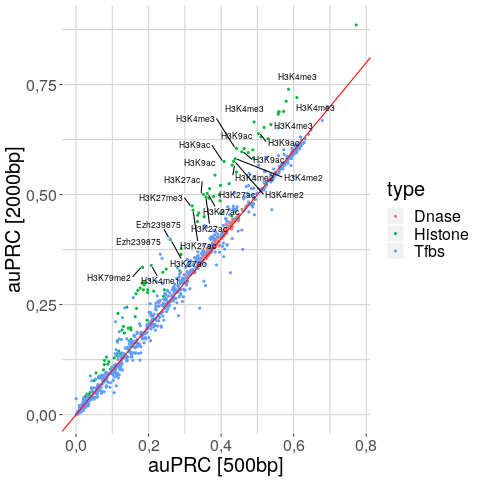

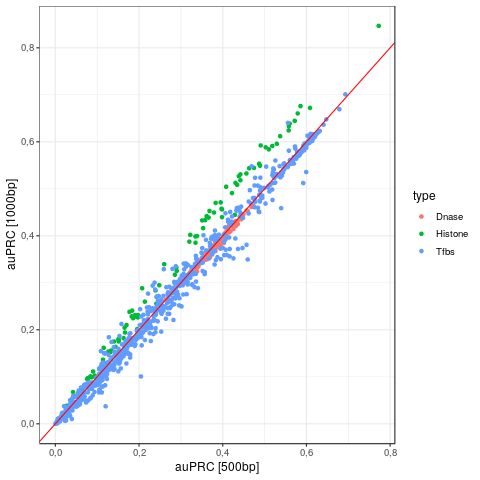

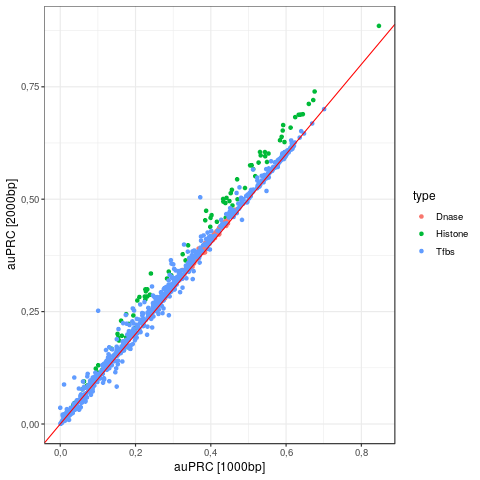

In [12]:
%%R

g1 = ggplot(df, aes(x=auprc1, y=auprc3, color=type)) + geom_point(size=.8) +
  xlab("auPRC [500bp]") + ylab("auPRC [2000bp]") +  geom_abline(intercept=0.0, slope=1., color="red") +
  theme(
        text=element_text(size=20),
        panel.background= element_blank(),
        panel.grid.major.y=element_line(size = 0.5, linetype = 'solid',
                                        colour = "lightgray"),
        panel.grid.minor.y=element_line(size = 0.5, linetype = 'solid',
                                        colour = "lightgray"),
        panel.grid.major.x=element_line(size = 0.5, linetype = 'solid',
                                        colour = "lightgray"),
        panel.grid.minor.x=element_line(size = 0.5, linetype = 'solid',
                                        colour = "lightgray")) +
  geom_text_repel(
    data = subset(df, auprc3-auprc1 >=.13),
    aes(label = labels),
    size = 3,
    box.padding = unit(0.35, "lines"),
    point.padding = unit(0.3, "lines"),
    color='black',
  )
#    theme_bw(base_size = 12)
print(g1)

g2 = ggplot(df, aes(x=auprc1, y=auprc2, color=type)) + geom_point() +
  xlab("auPRC [500bp]") + ylab("auPRC [1000bp]")  +
  geom_abline(intercept=0.0, slope=1., color="red") +
  theme_bw(base_size = 12)
print(g2)
g3 = ggplot(df, aes(x=auprc2, y=auprc3, color=type)) + geom_point() +
  xlab("auPRC [1000bp]") + ylab("auPRC [2000bp]")  +
  geom_abline(intercept=0.0, slope=1., color="red") +
  theme_bw(base_size = 12)
print(g3)

# ggsave("figure/compare_500_vs_2000_typelabel.png", g1)


For histone modifications as well as for histone modifiers, 
we observe an improved performance due the the elongated context window.
This is not observed for DNAse and TFBS, generally.


Similarly, we infestigate this effect for DanQ

In [13]:
%%R

# load data
r11 = data.frame(auprc=t(as.matrix(read.table('deepsea_results/evaluation/danq_sdouble_o3_f150_aTrue_rr1/auprc.tsv',header=T))))
r12 = data.frame(auprc=t(as.matrix(read.table('deepsea_results/evaluation/danq_sdouble_o3_f400_aTrue_rr1/auprc.tsv',header=T))))
r13 = data.frame(auprc=t(as.matrix(read.table('deepsea_results/evaluation/danq_sdouble_o3_f900_aTrue_rr1/auprc.tsv',header=T))))


# extract labels and categories
labels=data.frame(ids=rownames(r12))
labels$type = ""
labels$type[startsWith(as.character(labels$ids), 'E')] = "Histone"
labels$type[startsWith(as.character(labels$ids), 'wgEncodeAwgTfbs')] = "Tfbs"
labels$type[startsWith(as.character(labels$ids), 'wgEncodeAwgDnase')] = "Dnase"


df = data.frame(auprc1=r11$auprc, auprc2=r12$auprc, auprc3=r13$auprc, type=labels$type, labels=as.character(labels$ids), stringsAsFactors = FALSE)

source("make_labels.R")



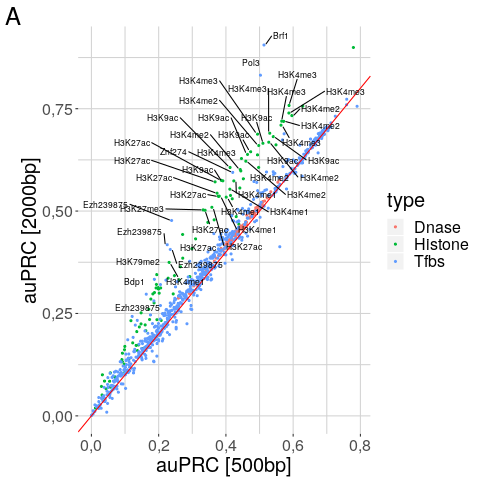

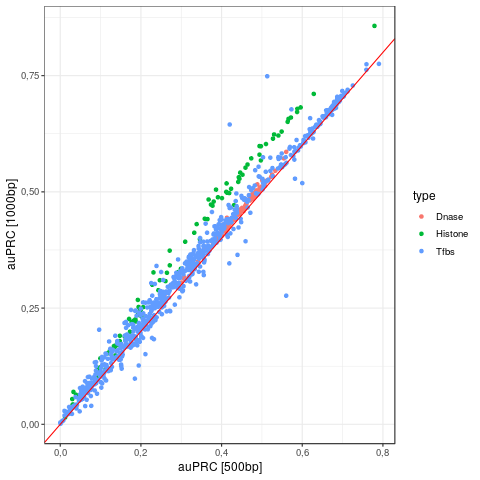

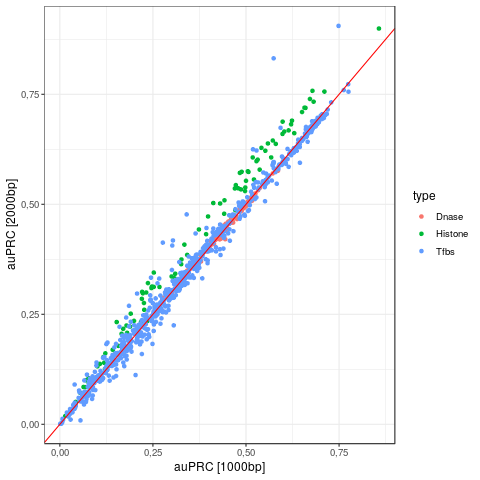

In [14]:
%%R

g1 = ggplot(df, aes(x=auprc1, y=auprc3, color=type)) + geom_point(size=.8) +
  xlab("auPRC [500bp]") + ylab("auPRC [2000bp]") +  geom_abline(intercept=0.0, slope=1., color="red") + labs(tag="A") +
  theme(
        text=element_text(size=20),
        panel.background= element_blank(),
        panel.grid.major.y=element_line(size = 0.5, linetype = 'solid',
                                        colour = "lightgray"),
        panel.grid.minor.y=element_line(size = 0.5, linetype = 'solid',
                                        colour = "lightgray"),
        panel.grid.major.x=element_line(size = 0.5, linetype = 'solid',
                                        colour = "lightgray"),
        panel.grid.minor.x=element_line(size = 0.5, linetype = 'solid',
                                        colour = "lightgray")) +
  geom_text_repel(
    data = subset(df, auprc3-auprc1 >=.13),
    aes(label = labels),
    size = 3,
    box.padding = unit(0.35, "lines"),
    point.padding = unit(0.3, "lines"),
    color='black',
  )
#    theme_bw(base_size = 12)
print(g1)

#ggsave("figure/compare_500_vs_2000_typelabel_danq.png", g1, width=7, height=3)

g2 = ggplot(df, aes(x=auprc1, y=auprc2, color=type)) + geom_point() +
  xlab("auPRC [500bp]") + ylab("auPRC [1000bp]")  +
  geom_abline(intercept=0.0, slope=1., color="red") +
  theme_bw(base_size = 12)
print(g2)
g3 = ggplot(df, aes(x=auprc2, y=auprc3, color=type)) + geom_point() +
  xlab("auPRC [1000bp]") + ylab("auPRC [2000bp]")  +
  geom_abline(intercept=0.0, slope=1., color="red") +
  theme_bw(base_size = 12)
print(g3)


## Investigate the sequence feature order influence

For a number of TFs a significant performance improvement is obtained 
from using higher-order features for the DeepSEA architecture.

In [16]:
%%R

# load data

r12 = data.frame(auprc=t(as.matrix(read.table('deepsea_results/evaluation/dsea_sdouble_o1_f400_aTrue_rr1/auprc.tsv',header=T))))
r22 = data.frame(auprc=t(as.matrix(read.table('deepsea_results/evaluation/dsea_sdouble_o2_f400_aTrue_rr1/auprc.tsv',header=T))))
r32 = data.frame(auprc=t(as.matrix(read.table('deepsea_results/evaluation/dsea_sdouble_o3_f400_aTrue_rr1/auprc.tsv',header=T))))


R[write to console]: Error in file(file, "rt") : cannot open the connection
Calls: <Anonymous> ... withVisible -> data.frame -> t -> as.matrix -> read.table -> file

R[write to console]: In addition: 
R[write to console]: Warning message:

R[write to console]: In file(file, "rt") :
R[write to console]: 
 
R[write to console]:  cannot open file 'deepsea_results/evaluation/dsea_sdouble_o1_f400_aTrue_rr2/auprc.tsv': No such file or directory




Error in file(file, "rt") : cannot open the connection
Calls: <Anonymous> ... withVisible -> data.frame -> t -> as.matrix -> read.table -> file


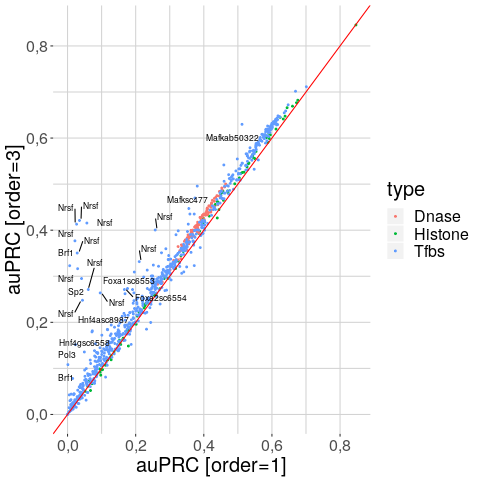

In [17]:
%%R

# load data

r12 = data.frame(auprc=t(as.matrix(read.table('deepsea_results/evaluation/dsea_sdouble_o1_f400_aTrue_rr1/auprc.tsv',header=T))))
r22 = data.frame(auprc=t(as.matrix(read.table('deepsea_results/evaluation/dsea_sdouble_o2_f400_aTrue_rr1/auprc.tsv',header=T))))
r32 = data.frame(auprc=t(as.matrix(read.table('deepsea_results/evaluation/dsea_sdouble_o3_f400_aTrue_rr1/auprc.tsv',header=T))))


# extract labels and categories
labels=data.frame(ids=rownames(r22))
labels$type = ""
labels$type[startsWith(as.character(labels$ids), 'E')] = "Histone"
labels$type[startsWith(as.character(labels$ids), 'wgEncodeAwgTfbs')] = "Tfbs"
labels$type[startsWith(as.character(labels$ids), 'wgEncodeAwgDnase')] = "Dnase"

df = data.frame(auprc1=r12$auprc, auprc2=r22$auprc, auprc3=r32$auprc, type=labels$type,
                labels=as.character(labels$ids), stringsAsFactors = FALSE)

source("make_labels.R")


g1 = ggplot(df, aes(x=auprc1, y=auprc3, color=type)) + geom_point(size=.7) +
  xlab("auPRC [order=1]") + ylab("auPRC [order=3]") +  geom_abline(intercept=0.0, slope=1., color="red") +
  theme(text=element_text(size=20),
        panel.background= element_blank(),
        panel.grid.major.y=element_line(size = 0.5, linetype = 'solid',
                                       colour = "lightgray"),
        panel.grid.minor.y=element_line(size = 0.5, linetype = 'solid',
                                       colour = "lightgray"),
        panel.grid.major.x=element_line(size = 0.5, linetype = 'solid',
                                   colour = "lightgray"),
        panel.grid.minor.x=element_line(size = 0.5, linetype = 'solid',
                                        colour = "lightgray")) +
  geom_text_repel(
    data = subset(df, auprc3-auprc1 >=.1),
    aes(label = labels),
    size = 3,
    box.padding = unit(0.35, "lines"),
    point.padding = unit(0.3, "lines"),
    color='black',
  )

print(g1)


We observe a similar, but even more pronounced effect for DanQ

In [18]:
%%R

r11 = data.frame(auprc=t(as.matrix(read.table('deepsea_results/evaluation/danq_sdouble_o1_f900_aTrue_rr1/auprc.tsv',header=T))))
r21 = data.frame(auprc=t(as.matrix(read.table('deepsea_results/evaluation/danq_sdouble_o2_f900_aTrue_rr1/auprc.tsv',header=T))))
r31 = data.frame(auprc=t(as.matrix(read.table('deepsea_results/evaluation/danq_sdouble_o3_f900_aTrue_rr1/auprc.tsv',header=T))))


# extract labels and categories
labels=data.frame(ids=rownames(r21))
labels$type = ""
labels$type[startsWith(as.character(labels$ids), 'E')] = "Histone"
labels$type[startsWith(as.character(labels$ids), 'wgEncodeAwgTfbs')] = "Tfbs"
labels$type[startsWith(as.character(labels$ids), 'wgEncodeAwgDnase')] = "Dnase"

df = data.frame(auprc1=r11$auprc, auprc2=r21$auprc, auprc3=r31$auprc, type=labels$type,
                labels=as.character(labels$ids), stringsAsFactors = FALSE)

df$delta_auprc = df$auprc3 - df$auprc1

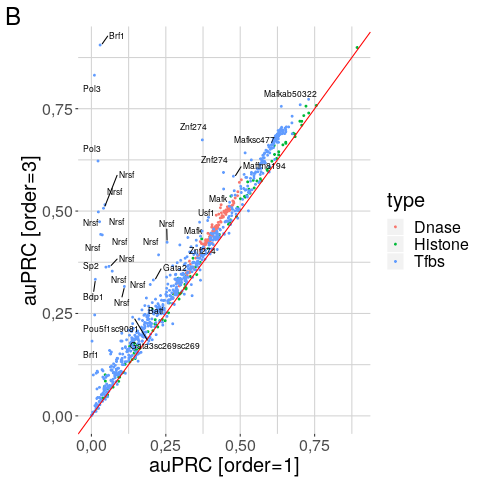

In [19]:
%%R

source("make_labels.R")

g1 = ggplot(df, aes(x=auprc1, y=auprc3, color=type)) + geom_point(size=.7) +
  xlab("auPRC [order=1]") + ylab("auPRC [order=3]") +  geom_abline(intercept=0.0, slope=1., color="red") +
  theme(text=element_text(size=20),
        panel.background= element_blank(),
        panel.grid.major.y=element_line(size = 0.5, linetype = 'solid',
                                       colour = "lightgray"),
        panel.grid.minor.y=element_line(size = 0.5, linetype = 'solid',
                                       colour = "lightgray"),
        panel.grid.major.x=element_line(size = 0.5, linetype = 'solid',
                                   colour = "lightgray"),
        panel.grid.minor.x=element_line(size = 0.5, linetype = 'solid',
                                        colour = "lightgray")) +
  geom_text_repel(
    data = subset(df, auprc3-auprc1 >=.1),
    aes(label = labels),
    size = 3,
    box.padding = unit(0.35, "lines"),
    point.padding = unit(0.3, "lines"),
    color='black',
  ) + labs(tag="B")

g1
print(g1)

# ggsave("figure/compare_1_vs_3_typelabel_danq.png", g1, width=7, height=3)


[1] 31


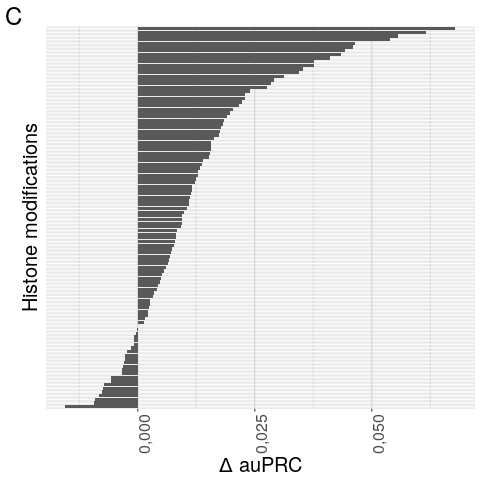

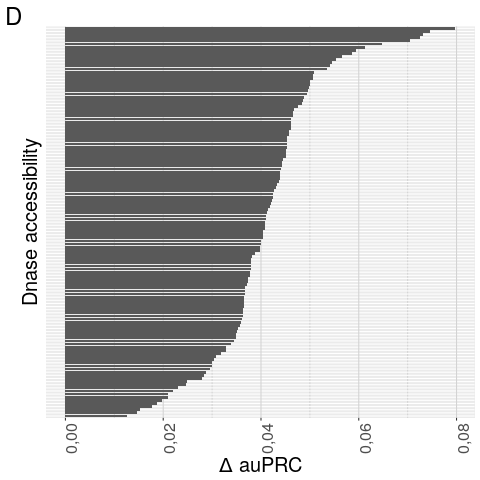

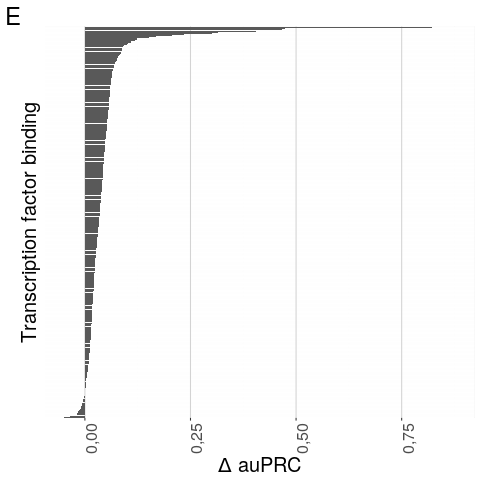

In [20]:
%%R

library(dplyr)
# load data

r11 = data.frame(auprc=t(as.matrix(read.table('deepsea_results/evaluation/danq_sdouble_o1_f900_aTrue_rr1/auprc.tsv',header=T))))
r21 = data.frame(auprc=t(as.matrix(read.table('deepsea_results/evaluation/danq_sdouble_o2_f900_aTrue_rr1/auprc.tsv',header=T))))
r31 = data.frame(auprc=t(as.matrix(read.table('deepsea_results/evaluation/danq_sdouble_o3_f900_aTrue_rr1/auprc.tsv',header=T))))


# extract labels and categories
labels=data.frame(ids=rownames(r21))
labels$type = ""
labels$type[startsWith(as.character(labels$ids), 'E')] = "Histone"
labels$type[startsWith(as.character(labels$ids), 'wgEncodeAwgTfbs')] = "Tfbs"
labels$type[startsWith(as.character(labels$ids), 'wgEncodeAwgDnase')] = "Dnase"

df = data.frame(auprc1=r11$auprc, auprc2=r21$auprc, auprc3=r31$auprc, type=labels$type,
                labels=as.character(labels$ids), stringsAsFactors = FALSE)

df$delta_auprc = df$auprc3 - df$auprc1
print(nrow(subset(df, type=="Tfbs" & delta_auprc>.1)))

subdf = arrange(subset(df, type=="Histone"), delta_auprc)
g1 = ggplot(subdf, aes(x=labels, y=delta_auprc)) +  scale_x_discrete(limits=subdf$labels) + coord_flip() +
   geom_bar(stat='identity') +
  theme(text=element_text(size=20),
        # panel.background = element_blank(),
        panel.grid.major.x=element_line(size = 0.5, linetype = 'solid',
                                        colour = "lightgray"),
        panel.grid.minor.x=element_line(size = 0.5, linetype = 'solid',
                                        colour = "lightgray"),
        axis.text.x = element_text(angle=90, hjust=1),
        axis.text.y=element_blank(),
        axis.ticks.y=element_blank()) +
  ylab(expression(Delta~"auPRC")) + xlab("Histone modifications") + labs(tag="C")

subdf = arrange(subset(df, type=="Dnase"), delta_auprc)
g2 = ggplot(subdf, aes(x=labels, y=delta_auprc)) +  scale_x_discrete(limits=subdf$labels) + coord_flip() +
  geom_bar(stat='identity') +
  theme(text=element_text(size=20),
        # panel.background = element_blank(),
        panel.grid.major.x=element_line(size = 0.5, linetype = 'solid',
                                        colour = "lightgray"),
        panel.grid.minor.x=element_line(size = 0.5, linetype = 'solid',
                                        colour = "lightgray"),
        axis.text.x = element_text(angle=90, hjust=1),
        axis.text.y=element_blank(),
        axis.ticks.y=element_blank()) +
  ylab(expression(Delta~"auPRC")) + xlab("Dnase accessibility") + labs(tag="D")

subdf = arrange(subset(df, type=="Tfbs"), delta_auprc)
g3 = ggplot(subdf, aes(x=labels, y=delta_auprc)) +  scale_x_discrete(limits=subdf$labels) + coord_flip() +
  geom_bar(stat='identity') +
  theme(text=element_text(size=20),
        # panel.background = element_blank(),
        panel.grid.major.x=element_line(size = 0.5, linetype = 'solid',
                                        colour = "lightgray"),
        panel.grid.minor.x=element_line(size = 0.5, linetype = 'solid',
                                        colour = "lightgray"),
        axis.text.x = element_text(angle=90, hjust=1),
        axis.text.y=element_blank(),
        axis.ticks.y=element_blank()) +
  ylab(expression(Delta~"auPRC")) + xlab("Transcription factor binding") + labs(tag="E")

print(g1)
print(g2)
print(g3)